In [1]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
from scipy.integrate import odeint
from __future__ import division
from scipy import *
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xo = 0.5
gamma = 0.8
yr = 0.1 #kg kgCO2 −1
TAO = 15

In [3]:
# en la matriz parametros se define cada conbinación (xk, A) como una fila de la matriz
parametros = np.array([[0.1, 1],[0.3, 2],[0.4, 4]])
parametros

array([[ 0.1,  1. ],
       [ 0.3,  2. ],
       [ 0.4,  4. ]])

In [4]:
def intervalosExtraccion(tao, xk, A):
    tao1 = (xo - xk) / (gamma * A * yr)
    tao2 = tao1 + xk / (gamma * A * yr) * np.log(xk / xo + (1 - xk / xo) * np.exp(xo / xk * A))
    zk = xk / (A * xo) * np.log((xo * np.exp(gamma * A * yr / xk * (tao - tao1)) - xk) / (xo - xk))

    return tao1, tao2, zk


In [5]:
def rendimiento(tao, xk, A):
    
    tao1, tao2, zk = intervalosExtraccion(tao, xk, A)
    
    if tao <= tao1 and tao < tao2:
        e = gamma * yr* tao * (1- np.exp(- A))
        #print("tao < tao1 and tao < tao2")
        return e
    if tao > tao1 and tao <= tao2:
        zk = xk / (A * xo) * np.log((xo * np.exp(gamma * A * yr / xk * (tao - tao1)) - xk) / (xo - xk))
        e = gamma * yr * (tao - tao1 * np.exp(- A * (1 - zk)))
        #print("tao >= tao1 and tao < tao2")
        return e
    if tao > tao2:
        e = xo - xk / A * np.log(1 + xk / xo * (np.exp(xo / xk * A) - 1) * np.exp(gamma * A * yr / xk * (tao1 - tao)))
        #print("tao >= tao2")
        return e

In [6]:
caso1 = [[rendimiento(tao, xk, A) for tao in np.linspace(0,TAO)] for xk, A in parametros]
caso1

/home/andres-python/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


[[0.0,
  0.015480503481515702,
  0.030961006963031404,
  0.046441510444547106,
  0.061922013926062808,
  0.077402517407578517,
  0.092883020889094212,
  0.10836352437060991,
  0.12384402785212562,
  0.13932453133364131,
  0.15480503481515703,
  0.17028553829667273,
  0.18576604177818842,
  0.20124654525970415,
  0.21672704874121981,
  0.23220755222273556,
  0.24768805570425123,
  0.26316226702728307,
  0.27855816883989115,
  0.29378225368823213,
  0.30876157355231604,
  0.32343654083397494,
  0.33775619815162916,
  0.35167527000149623,
  0.36515222904087458,
  0.3781479701886501,
  0.39062486466268487,
  0.402546060258831,
  0.41387494623903642,
  0.42457473119368283,
  0.43460810015827545,
  0.44393692830690873,
  0.45252203554707215,
  0.46032297089746099,
  0.46729781856882635,
  0.47340301974008819,
  0.47859332113463482,
  0.48286931725454763,
  0.48634893672002549,
  0.48915980931666803,
  0.49141660746817667,
  0.49321943250109174,
  0.49465369004190646,
  0.49579093662844093,
 

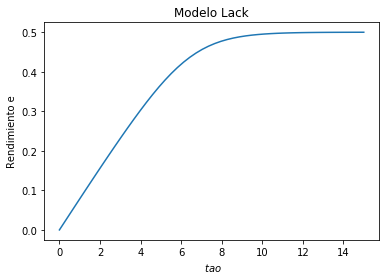

In [9]:
Tao = np.linspace(0,TAO)

plt.plot(Tao, caso1[2])
plt.title("Modelo Lack")
plt.xlabel(" $tao $ ")
plt.ylabel("Rendimiento e")